(sec:visualization_4)=
# Seaborn 시각화 라이브러리

In [221]:
import numpy as np
import pandas as pd

In [222]:
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
pd.options.display.max_columns = 20

In [223]:
np.random.seed(12345)
np.set_printoptions(precision=4, suppress=True)

In [224]:
import matplotlib.pyplot as plt
import matplotlib

In [225]:
plt.rc("figure", figsize=(10, 6))

## seaborn 라이브러리 불러오기

seaborn 라이브러리는 matplotlib을 바탕으로 멋진 통계 관련 그래프를 그리는 API(도구)를 제공한다.
활용법 설명을 위해 서빙 팁(tip) 데이터를 계속 활용한다.

In [226]:
import seaborn as sns

**서빙 팁 데이터**

서빙 팁 데이터는 어떤 식당에서 일주일 동안 올린 수입 내역을 담고 있으며,
seabon 라이브러리도 제공한다.

In [227]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


총 244개의 데이터 샘플을 담고 있으며, 열별 라벨(특성)이 의미하는 바는 다음과 같다.

- `total_bill`: 총 수입
- `tip`: 서빙 팁 수입
- `smoker`: 테이블 손님 흡연 여부 
- `day`: 요일
- `time`: 시간대(점심/저녁)
- `size`: 테이블 손님 수

손님의 성별 정보를 담고 있는 `sex` 열은 삭제한다.

In [228]:
tips.drop('sex', axis=1, inplace=True)

tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


요일별로 총 순수수입에서 서빙 팁이 차지하는 비율을 특성으로 추가하자.

- 팁 비율: 총 순수수입 $=$ 총 수입 $-$ 팁

In [229]:
tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


## 막대 그래프

**`seaborn.barplot()` 함수**

요일별 서빙 팁의 비율의 평균값(mean)은 다음과 같다.
막대 끝에 위치한 검정 직선 기본적으로 신뢰도 95%의 신뢰구간을 표시하는 오차 막대(error bar)이다.

참고: 축에 사용될 값들은 열 특성이름을 이용하여 지정한다.

<Axes: xlabel='tip_pct', ylabel='day'>

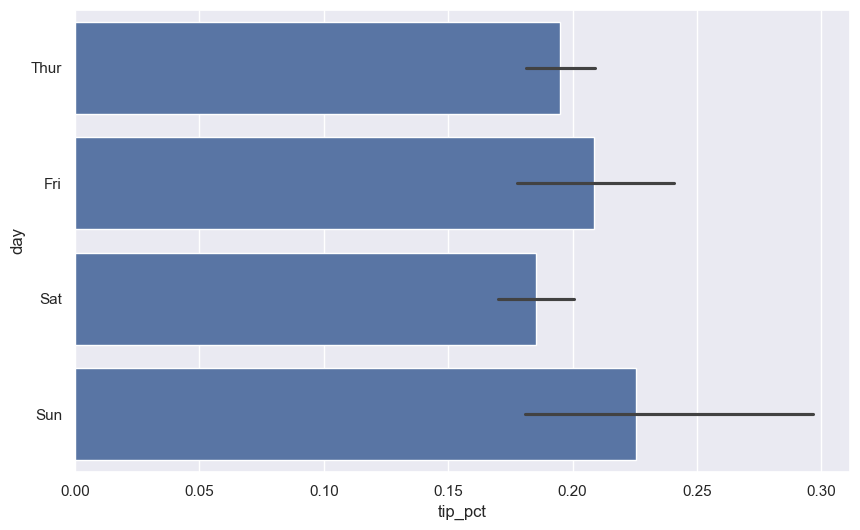

In [230]:
sns.barplot(x="tip_pct", y="day", data=tips, orient="h")

`errorbar` 옵션을 조절하면 신뢰구간을 표준편차로 바꾸거나 아무 것도 표시하지 않도록 할 수 있다.

- `errorbar='sd'` 옵션: 신뢰 구간 대신에 표준 편차(standard deviation) 표시.
- `errorbar=None` 옵션: 검정 막대 표시하지 않음.

<Axes: xlabel='tip_pct', ylabel='day'>

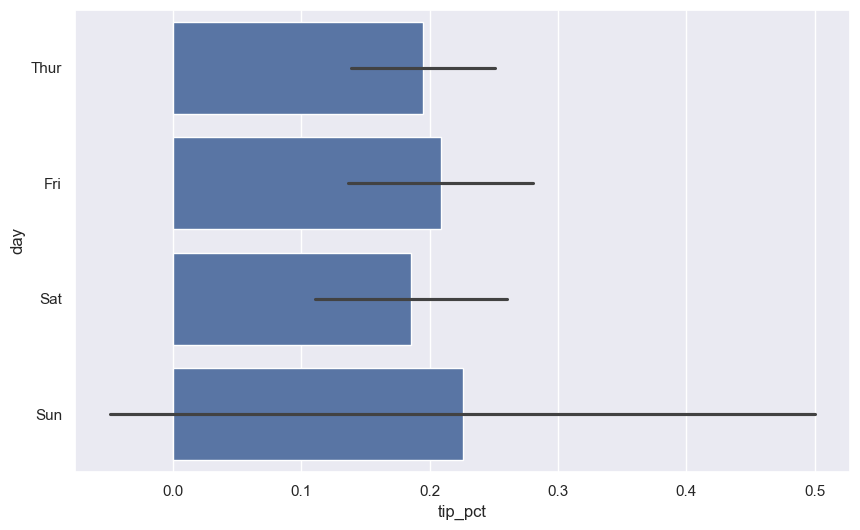

In [231]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h', errorbar='sd')

<Axes: xlabel='tip_pct', ylabel='day'>

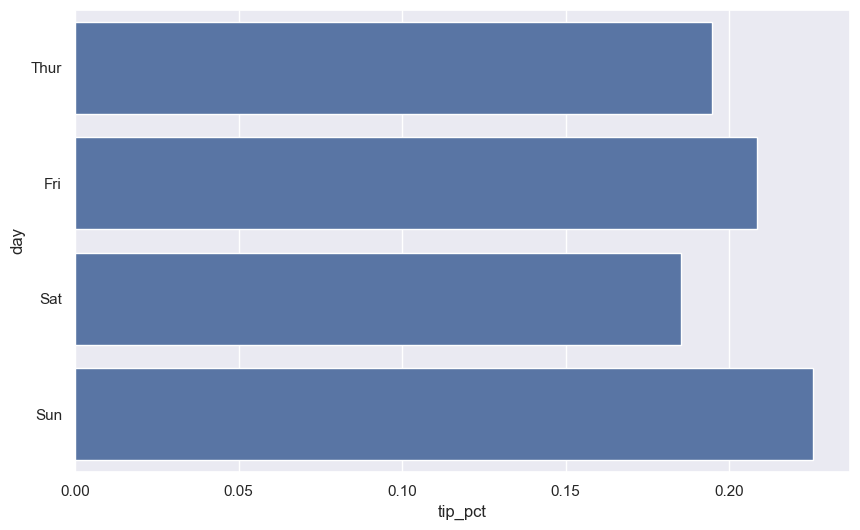

In [232]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h', errorbar=None)

* `hue='time'`: 시간대를 추가 기준으로 사용하면 다음 결과가 보인다.

<Axes: xlabel='tip_pct', ylabel='day'>

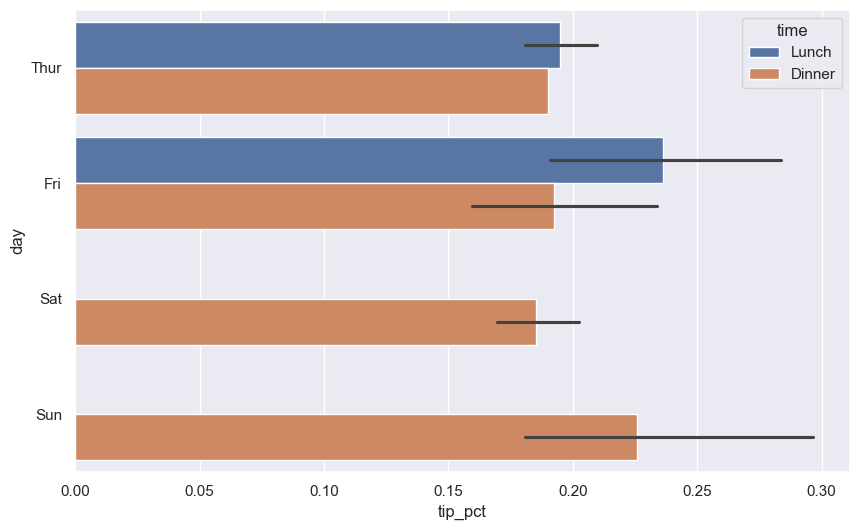

In [233]:
sns.barplot(x="tip_pct", y="day", hue="time", data=tips, orient="h")

참고: 목요일 저녁 막대에 신뢰구간이 표시되지 않는 이유는 단 한 번의 파티만 있었기 때문이다.

In [234]:
day_thur = tips['day']=='Thur'
time_dinner = tips['time']=='Dinner'

In [235]:
tips[day_thur & time_dinner]

,total_bill,tip,smoker,day,time,size,tip_pct
243,18.78,3.0,No,Thur,Dinner,2,0.190114


## 그래프 스타일 설정

자주 사용되는 Seaborn 그래프 스타일을 지정하는 함수는 다음 세 가지다.

- `sns.set_style()`
- `sns.set_context()`
- `sns.set_palette()`

여기서는 `sns.set_style()`과 `sns.set_palette()`를 자세히 살펴 본다.

### 그래프 기본 설정

`set_style()` 함수가 그래프의 기본 설정을 담당한다.

- 참고: [Seaborn Styling, Part 1: Figure Style and Scale](https://www.codecademy.com/article/seaborn-design-i)

In [236]:
sns.set_style("whitegrid")

지정된 설정은 모든 그래프에 영향을 준다.

<Axes: xlabel='tip_pct', ylabel='day'>

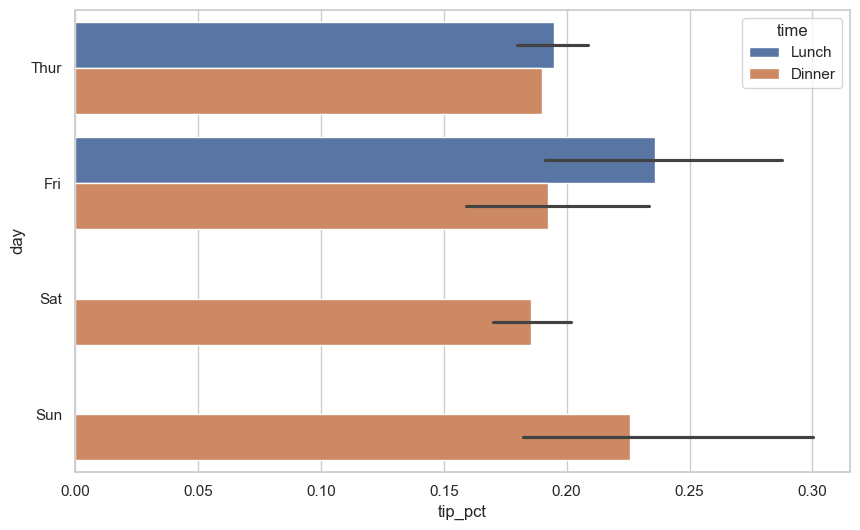

In [237]:
sns.barplot(x="tip_pct", y="day", hue="time", data=tips, orient="h")

### 히스토그램과 밀도그래프

아래 pandas의 `plot()` 함수를 이용하여 히스토그램을 그리는 것을 보여준다.
사용되는 데이트는 요일별 팁의 비율이며 최고 2.5% 정도에 다다른다.

In [238]:
tips.tip_pct.max()

np.float64(2.452380952380953)

<Axes: ylabel='Frequency'>

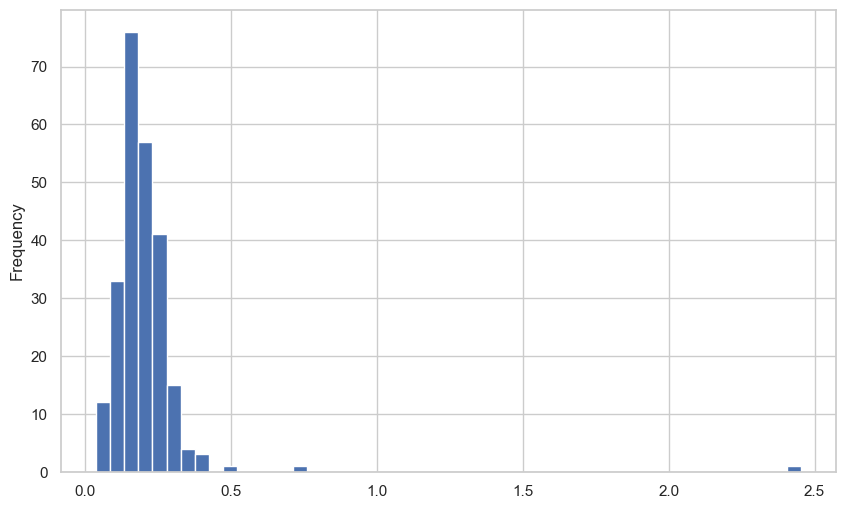

In [239]:
tips["tip_pct"].plot.hist(bins=50)

In [240]:
sns.set_style("darkgrid")

<Axes: ylabel='Frequency'>

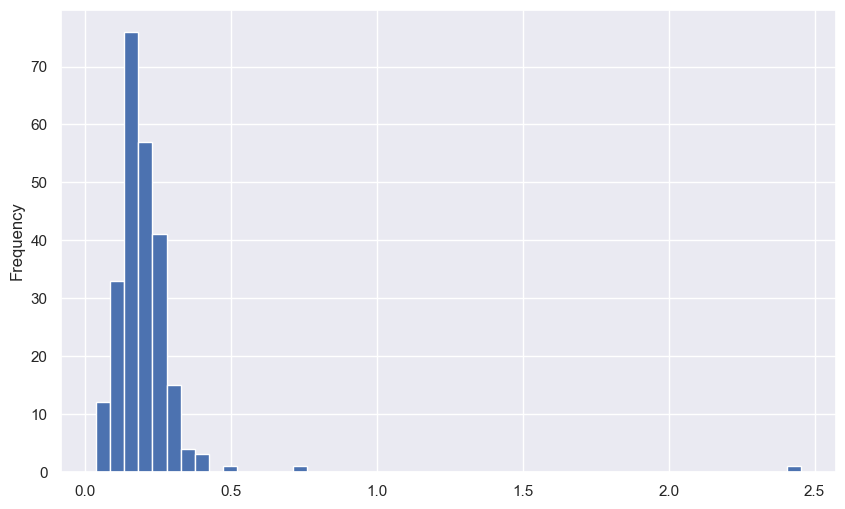

In [241]:
tips["tip_pct"].plot.hist(bins=50)

In [242]:
sns.set_style("dark")

<Axes: ylabel='Frequency'>

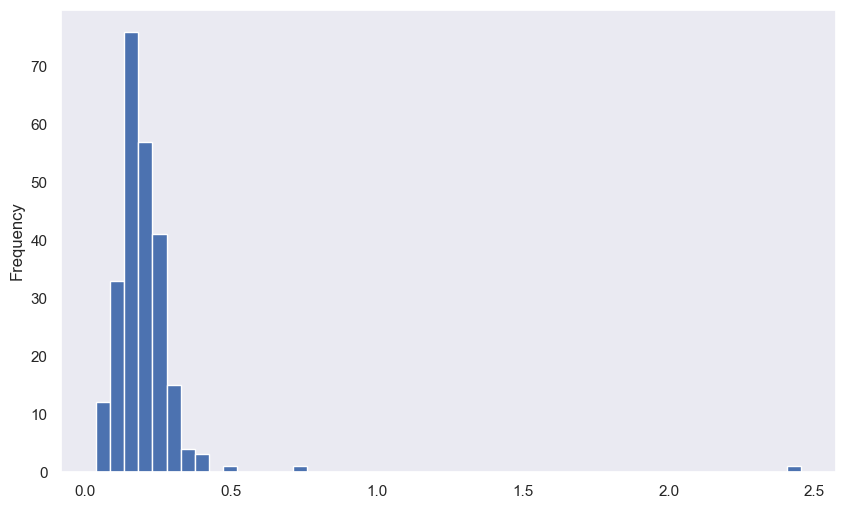

In [243]:
tips["tip_pct"].plot.hist(bins=50)

### 색상 스타일 설정

`sns.set_palette()` 함수가 색상 스타일을 지정한다.

- 참고: [Seaborn Styling, Part 2: Color](https://www.codecademy.com/article/seaborn-design-ii)

In [244]:
sns.set_palette("Greys_r")

지정된 설정은 모든 그래프에 영향을 준다.

**연속 확률 밀도 함수**

`pandas.plot.density()` 함수는 히스토그램에 대한 추정 연속 확률 밀도 함수의 그래프를 그린다.

<Axes: ylabel='Density'>

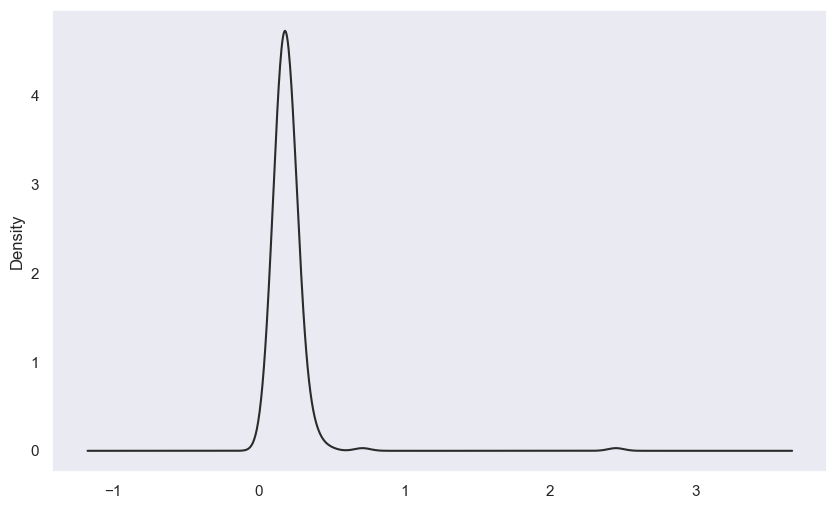

In [245]:
plt.figure()

tips["tip_pct"].plot.density()

In [246]:
sns.set_palette('pastel')

<Axes: ylabel='Density'>

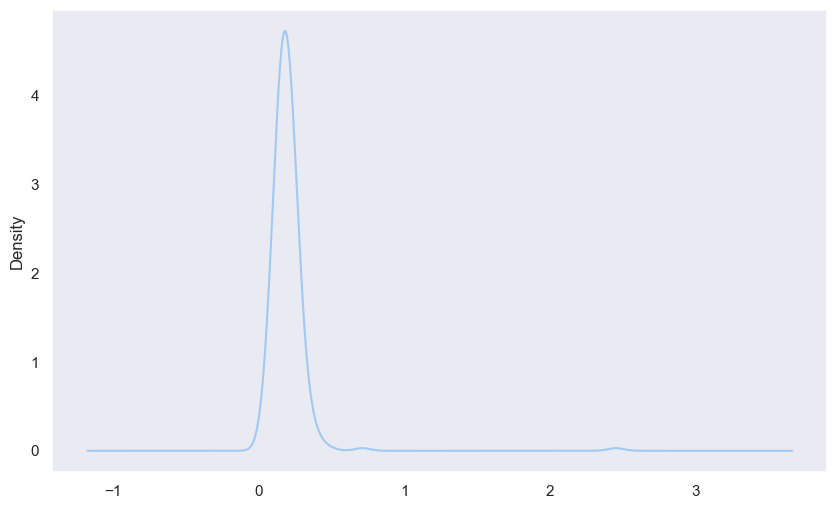

In [247]:
plt.figure()

tips["tip_pct"].plot.density()

### seabon 그래프 속성 초기화

아래 명령문은 seaborn 그래프 속성을 초기화한다.

In [248]:
sns.set()

In [249]:
comp1 = np.random.standard_normal(200)
comp2 = 10 + 2 * np.random.standard_normal(200) #표준편차를 2배 넓히고 +10위치에 생성
#comp1은 평균0에 표준편차1 comp2는 평균10에 표준편차 2
values = pd.Series(np.concatenate([comp1, comp2]))
values

0      -0.204708
1       0.478943
2      -0.519439
3      -0.555730
4       1.965781
         ...    
395    10.262203
396     8.604772
397    12.671299
398     9.697922
399    10.885876
Length: 400, dtype: float64

<Axes: ylabel='Count'>

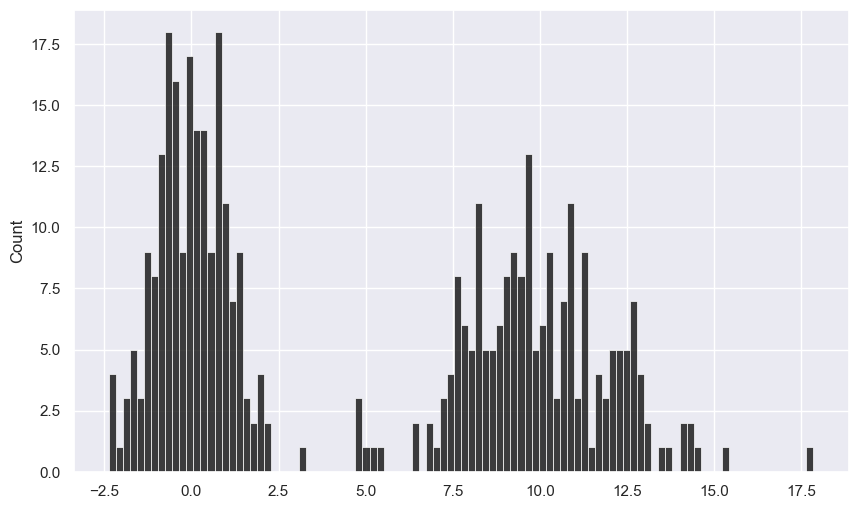

In [250]:
plt.figure()

sns.histplot(values, bins=100, color="black")

seaborn 라이브러리를 이용하여 히스토그램과 밀도그래프를 함께 그릴 수도 있다.
이를 위해 `seaborn.histplot()` 또는 `seaborn.displot()` 함수를 `kde=True` (커널 밀도 추정) 옵션과 함께 사용한다.

<Axes: ylabel='Count'>

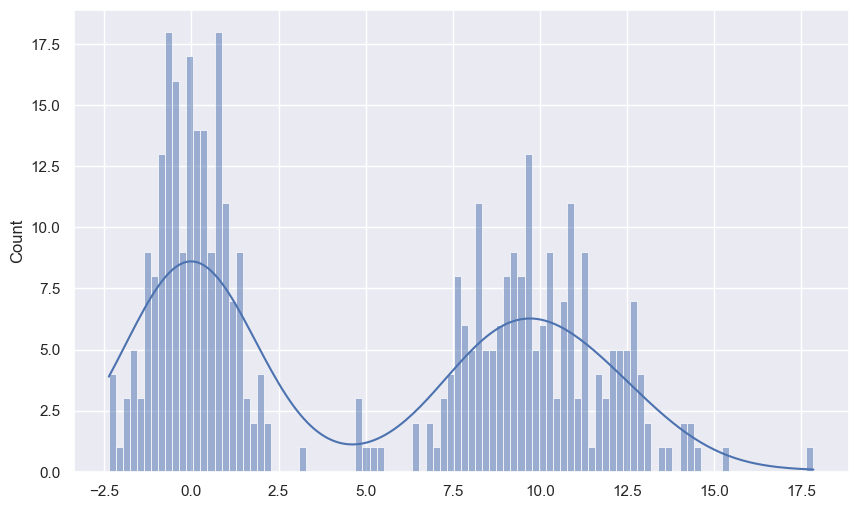

In [251]:
plt.figure()

sns.histplot(values, bins=100, kde=True)

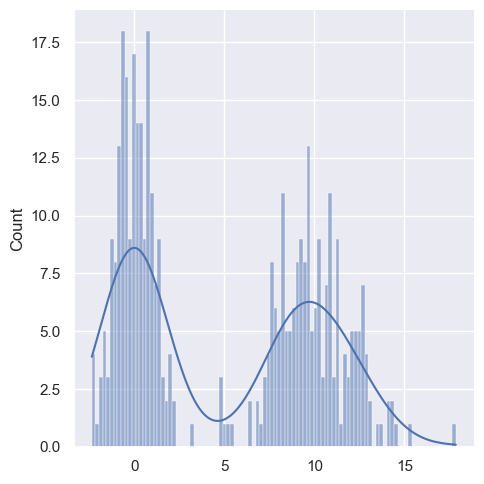

In [252]:
sns.displot(values, bins=100, kde=True)

`height`와 `aspect` 옵션을 이용하면 적절한 크기와 비율로 맞출 수 있다.

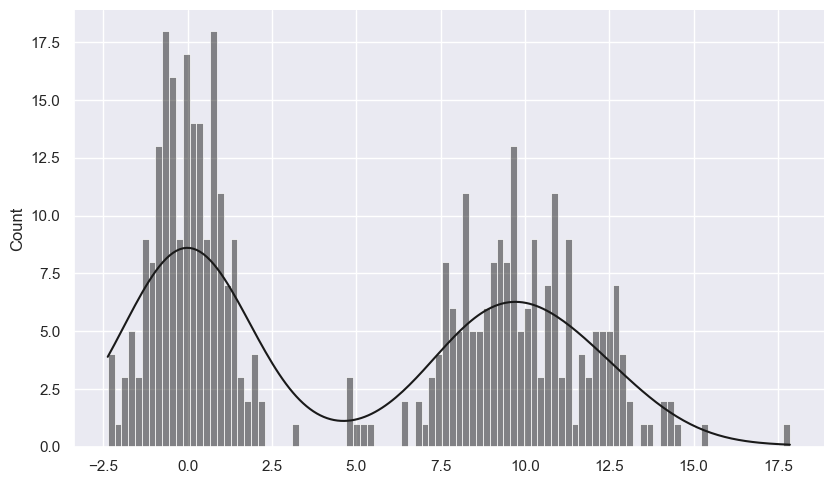

In [253]:
np.random.seed(12345)

comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)

values = pd.Series(np.concatenate([comp1, comp2]))

sns.displot(values, bins=100, color='k', kde=True, height=5, aspect=1.7)

**예제: 서빙 팁 비율의 히스토그램과 밀도 그래프**

In [254]:
data = tips['tip_pct']

<Axes: xlabel='tip_pct', ylabel='Count'>

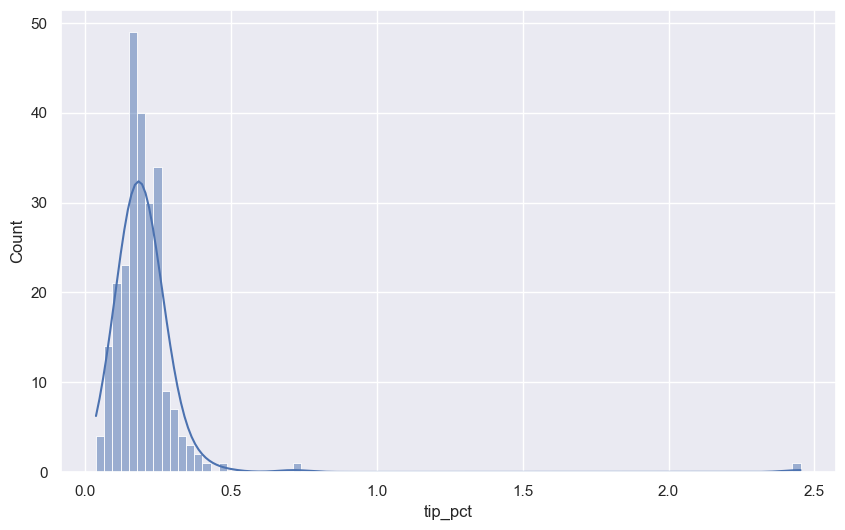

In [255]:
sns.histplot(data, kde=True)

### 산점도

산점도는 두 변수간의 관계를 좌표상의 점으로 표시하여 나타내는 그래프다.
산점도의 활용을 살펴보기 위해 1959년부터 2009년까지 미국의 거시경제지표를 담고 있는 데이터를 사용하며,
`statsmodels` 모듈에서 불러온다.

In [256]:
import statsmodels.api as sm

macro = sm.datasets.macrodata.load_pandas().data
macro

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


포함된 14개의 경제지표는 다음과 같다.

| 지표 | 설명 |
| :--- | :--- |
| year | 1959년 1분기 - 2009년 3분기 |
| quarter | 1 - 4분기|
| realgdp | 실질 국내총생산 (단위: 억 달러) |
| realcons | 실질 총민간 소비지출 (단위: 억 달러) |
| realinv | 실질 총민간 국내투자 (단위: 억 달러) |
| realgovt | 실질 연방 정부 소비지출 및 국내투자 (단위: 억 달러) |
| realdpi | 실질 가처분 소득 (단위: 억 달러) |
| cpi | 소비자 물가지수 |
| m1 | M1 통화지표 | 
| tbilrate | 3개월 만기 국채 수익률|
| unemp | 실업률 | 
| pop | 인구 |
| infl | 물가상승률 |
| realint | 실질 이자율 |

이중에 네 개의 지표만 이용해서 산점도를 설명한다.

- cpi: 분기별 소비자 물가지수
- m1: M1 통화지수
- tbilrate: 3개월 만기 국채 수익률
- unemp: 실업률

In [257]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
data

,cpi,m1,tbilrate,unemp
0,28.980,139.7,2.82,5.8
1,29.150,141.7,3.08,5.1
2,29.350,140.5,3.82,5.3
3,29.370,140.0,4.33,5.6
4,29.540,139.6,3.50,5.2
...,...,...,...,...
198,216.889,1474.7,1.17,6.0
199,212.174,1576.5,0.12,6.9
200,212.671,1592.8,0.22,8.1
201,214.469,1653.6,0.18,9.2


시간의 흐름에 따른 변화량을 살펴보려 한다. 
사용된 데이터의 척도(scale)을 맞추기 위해 로그값을 취한 후 분기별 변화량을 측정한다.

- `np.log()` 함수: 어레이/데이터프레임의 항목별로 적용되는 유니버설 함수
- `diff()` 메서드: 열별로 이전 행의 항목값과의 차이를 계산함. 
    0번 행이거나 결측치가 사용되었을 경우 결측치로 처리됨.
    `axis=1`로 지정하면 열별 차이를 계산함.
- `dropna()` 메서드: 결측치가 포함된 행 삭제.
    `axis=1`로 지정하면 결측치가 포함된 열 삭제.
    
0번 행은 무조건 결측치가 포함되기에 삭제된다.

In [258]:
trans_data = np.log(data).diff().dropna() #값의 규모가 크기에 log적용 차이값계산산
trans_data

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000
...,...,...,...,...
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339


**산점도와 선형회귀 곡선**

Text(0.5, 1.0, 'Changes in log(m1) versus log(unemp)')

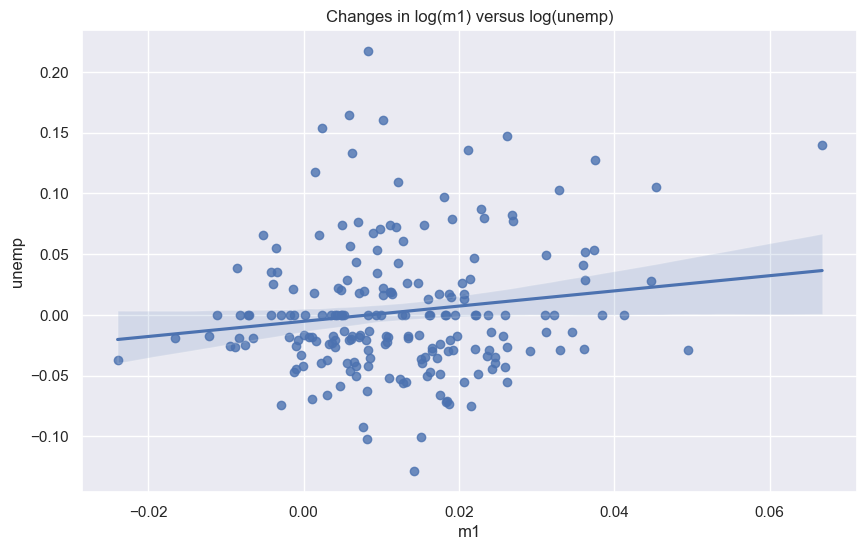

In [259]:
plt.figure()

ax = sns.regplot(x="m1", y="unemp", data=trans_data)
ax.set_title("Changes in log(m1) versus log(unemp)")


사실 `m1` 데이터와 `unemp` 데이터 사이의 선형관계가 많이 있어보이지는 않는다. 
실제로 두 특성 사이의 피어슨 상관계수는 0.15 정도로 매우 작다.

In [260]:
correlation = trans_data.corr()
correlation

,cpi,m1,tbilrate,unemp
cpi,1.000000,-0.050535,0.329456,0.019750
m1,-0.050535,1.000000,-0.360278,0.150729
tbilrate,0.329456,-0.360278,1.000000,-0.371491
unemp,0.019750,0.150729,-0.371491,1.000000


`seaborn.heatmap()` 함수를 이용하여 선형관계를 색으로 표현할 수 있다.

<Axes: >

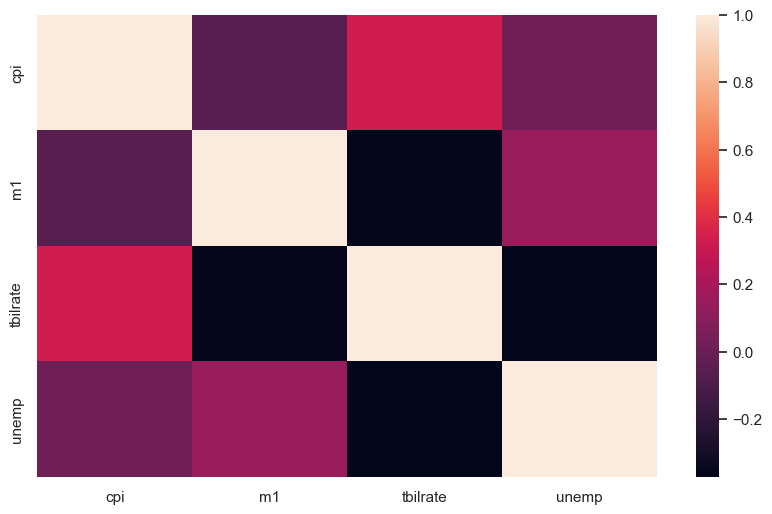

In [261]:
sns.heatmap(correlation)
# 색으로 시각화를 통해 빠르게 관계성을 파악할 수 있음

참고: 선형회귀 직선을 보이지 않으려면 `fit_reg=False` 옵션을 사용한다.

Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

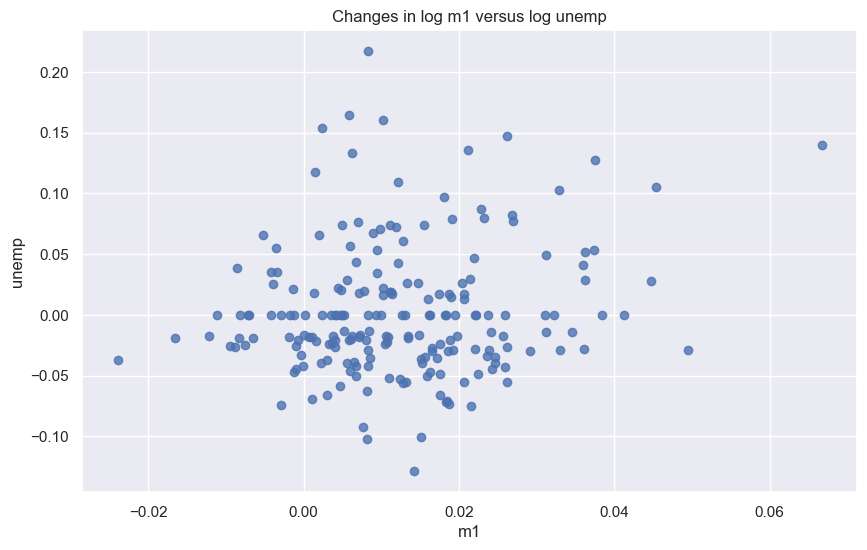

In [262]:
sns.regplot(x='m1', y='unemp', data=trans_data, fit_reg=False)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

`seaborn.regplot()` 함수의 보다 다양한 기능은 [공식문서](https://seaborn.pydata.org/generated/seaborn.regplot.html)를 참고한다.

**산점도 행렬**

상관계수와 히트맵의 경우처럼 가능한 모든 산점도를 한꺼번에 그릴 수 있다.
예를 들어 4개의 열 특성이 주어지면 4x4 모양의 격자를 산점도로 채운 그림이 그려진다.
대각선 상에는 해당 데이터의 도수분포도를 보여주는 히스토그램이 기본으로 입력된다.

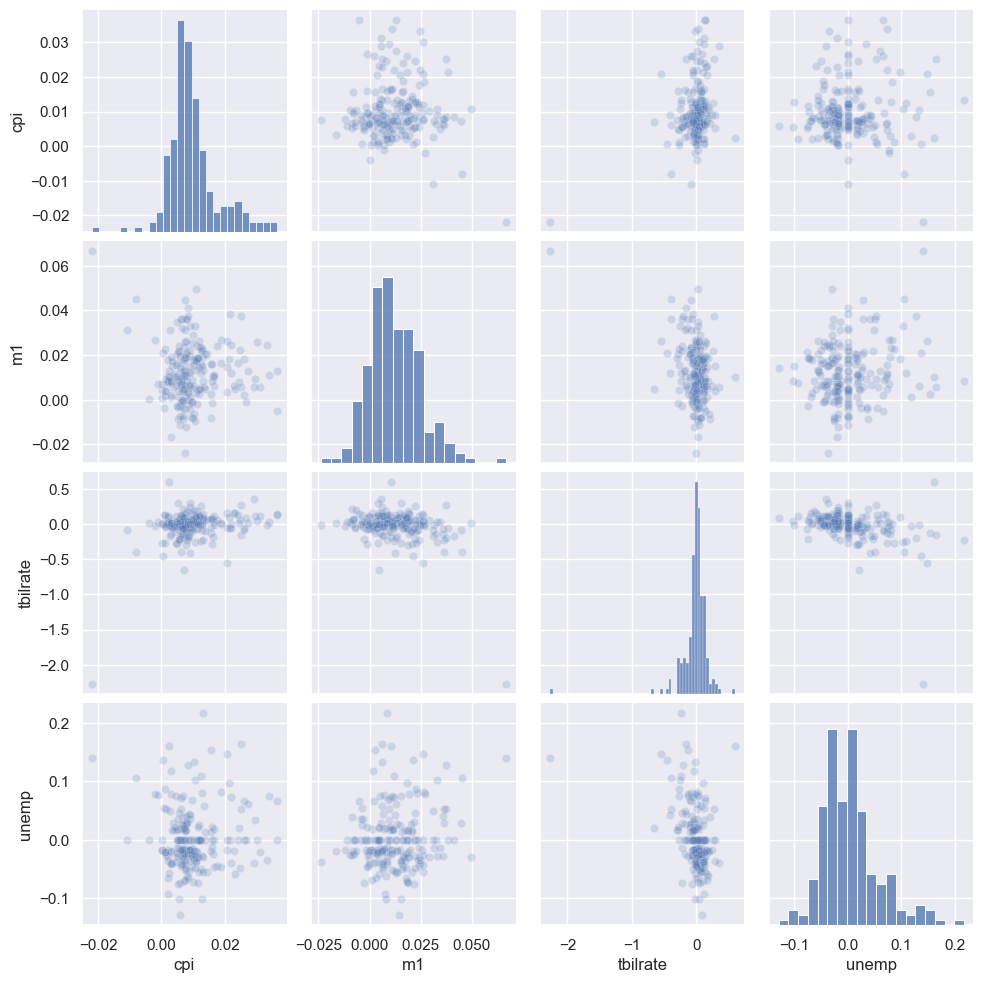

In [263]:
sns.pairplot(trans_data, plot_kws={'alpha': 0.2})

`diag_kind=kde` 옵션을 사용하면 대각선 상에 히스토그램 대신 밀도그래프가 삽입된다.

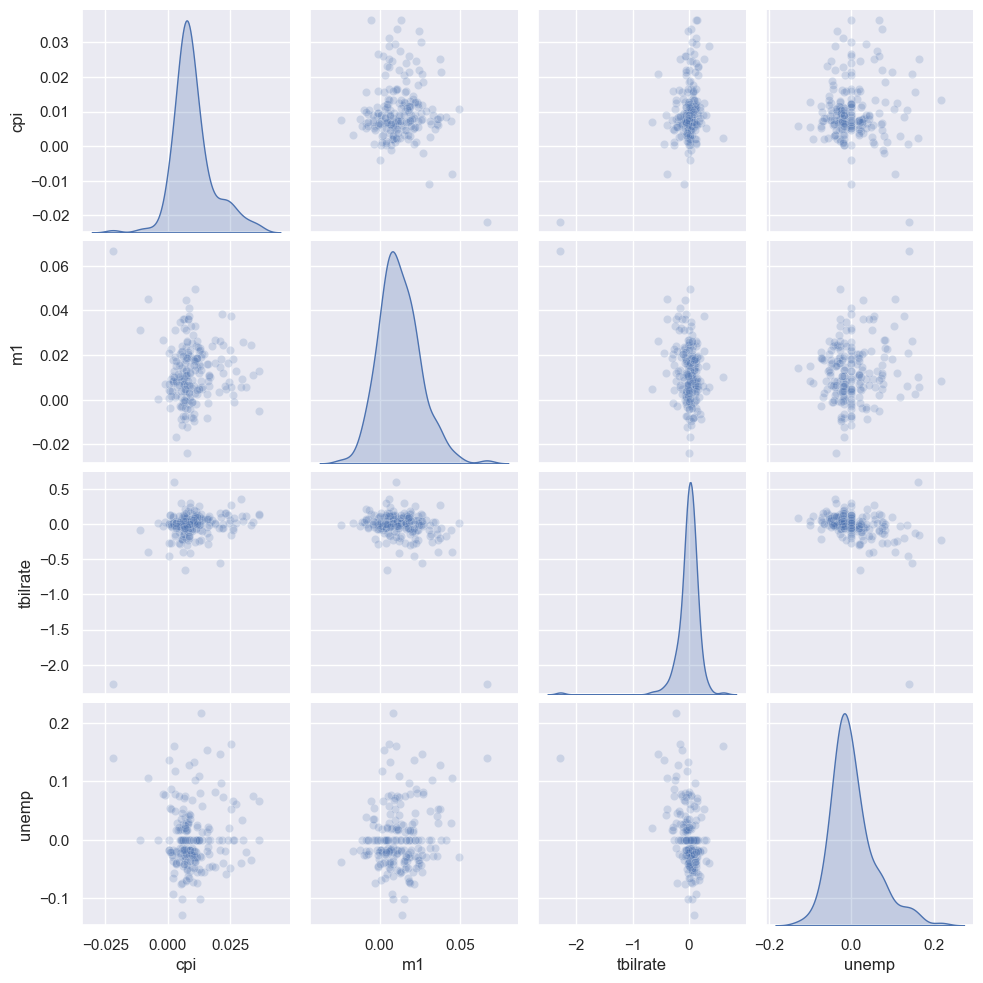

In [264]:
sns.pairplot(trans_data, diag_kind="kde", plot_kws={"alpha": 0.2})

### 패싯 그리드(Facet Grids)과 범주형 데이터

패싯그리드 클래스(`seaborn.FacetGrid`)는 여러 개의 `pyplot.subplots()` 함수와 비슷하게 작동한다.
다만, 지정된 옵션에 따라 격자 분할을 적절하게 지정한다. 

아래 코드는 요일별 팁 비율을 막대그래프로 보여준다. 단, 1% 미만의 팁 비율만 다룬다.
또한 흡연 여부에 따라 두 개의 막대그래프를 열별로 그린다.

- `col='smoker'`: 흡연 여부에 따른 구분
- `hue='time'`: 시간대별로 각각 다른 두 개의 막대그래프를 요일마다 그림.

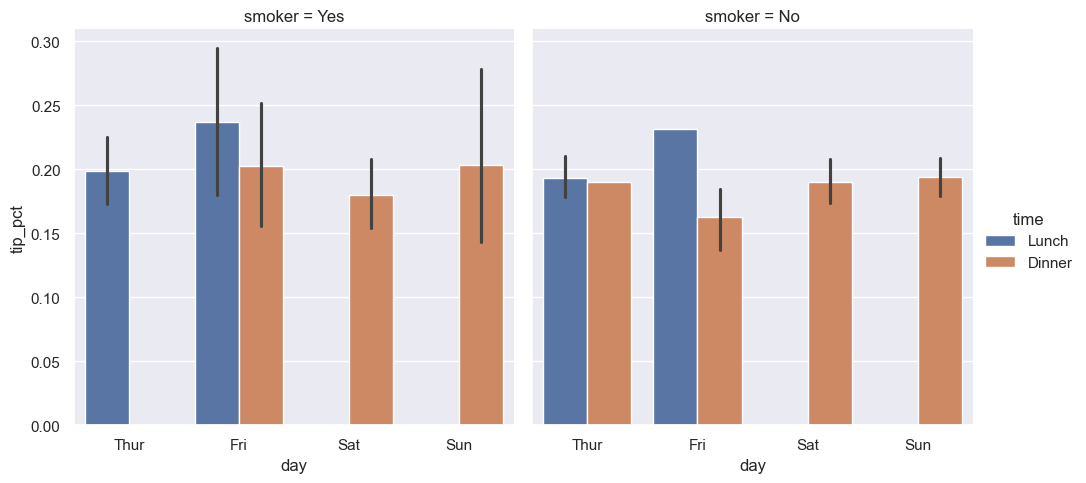

In [ ]:
'''sns.catplot(x="day", y="tip_pct", hue="time", col="smoker",
                           kind="bar", data=tips[tips.tip_pct < 1])'''
sns.catplot(tips[tips.tip_pct < 1], x="day", y="tip_pct", hue="time", col="smoker",
            kind="bar")
#데이터의 경우 data=으로 선택하지 말고 앞에다 적는 것이 확인하기 좋음.

열뿐만 아니라 행별로 구분된 그래프를 그리려면 `row` 옵션 인자를 활용한다.
예를 들어, 앞서 `hue='time'` 옵션을 아래와 같이 바꾸면 두 개의 행에 걸쳐 서로 다른 시간대별 막대그래프를 그리며 결국 2x2 모양의 격자에 총 네 개의 막대그래프가 그려진다.

- `row='time'`: 점심과 저녁 시간대를 행으로 구분한다.

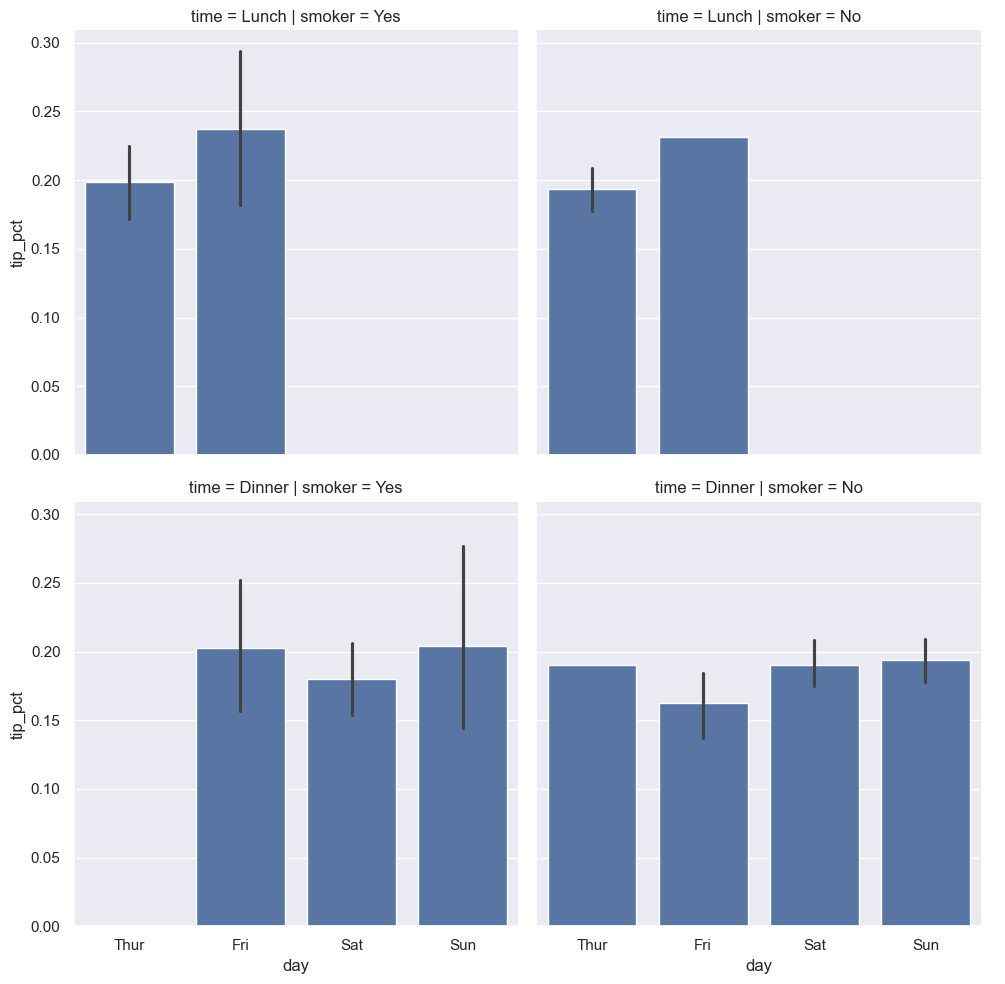

In [266]:
sns.catplot(x='day', y='tip_pct', row='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

물론 아래와 같이 `col` 옵션을 지정하지 않으면 행별로 하나의 막대그래프만 그릴 수도 있다.

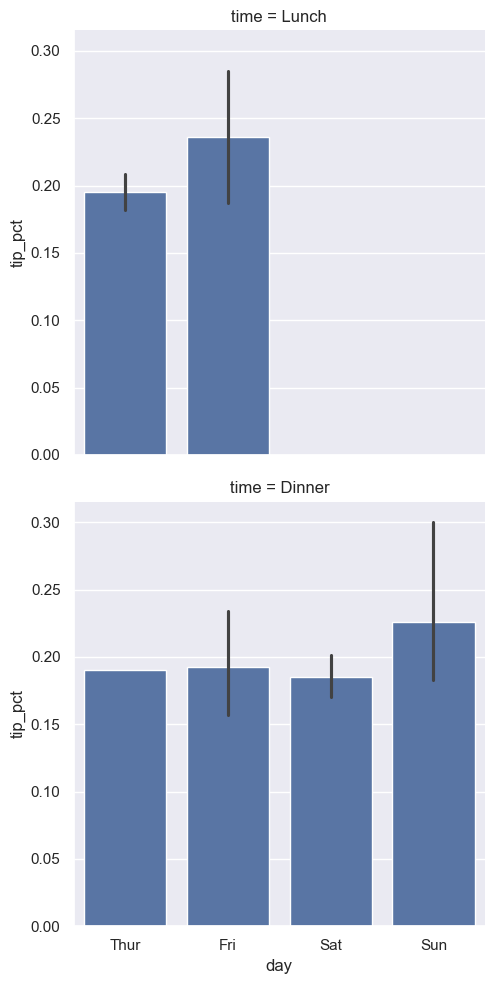

In [267]:
sns.catplot(x='day', y='tip_pct', row='time', kind='bar', data=tips)

`kind` 옵션에 따라 다양한 그래프를 그린다. 
보다 자세한 내용은 [seaborn.catplot 공식 문서](https://seaborn.pydata.org/generated/seaborn.catplot.html)를
참고한다.

아래 코드는 데이터의 중간값, 사분위수, 이상치 등을 보여주는 상자그림(box plot)를 그린다.

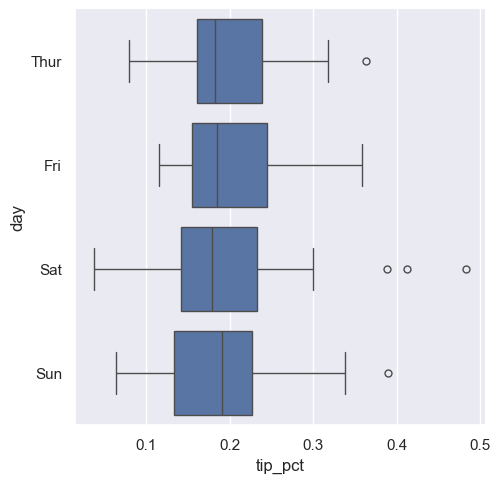

In [ ]:
sns.catplot(x="tip_pct", y="day", kind="box",
            data=tips[tips.tip_pct < 0.5])
#하한선: Q1 - 1.5*IQR
#상한선: Q3 - 1.5*IQR

In [269]:
plt.close('all')

## 기타 시각화 도구

matplotlib과 seaborn 등은 출판용도의 정적 그래프를 생성한다. 
반면에 웹에서 동적 대화형으로 작동하는 그래프를 파이썬으로 그리려면 
[Altair](https://altair-viz.github.io/),
[Bokeh](https://docs.bokeh.org/en/latest/),
[Plotly](https://github.com/plotly/plotly.py) 등을 이용할 수 있다.

데이터 시각화를 전문적으로 다루는 책으로는
[Fundamentals of Data Visualization](https://clauswilke.com/dataviz/)를 강추한다.